# Recopilatorio con Decission Tree

In [1]:
import pandas as pd
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Cargamos los datos que hemos procesado en R
df= pd.read_csv("C://Master Data Science/Master en Data Science/TFM/Transacciones de Banco Checo/DFTenenciaProductos2.csv")

In [3]:
df.columns[df.isnull().sum()!=0]

Index(['client_id_disponent', 'sex_disponent', 'birth_disponent', 'loan_id',
       'Date_Loan', 'Amount_Loan', 'Duration_Loan', 'Payments_Loan', 'status',
       'Status_Loan', 'owner_card_date'],
      dtype='object')

In [7]:
df1_original=df[['frequency', 'sex_owner','sex_disponent', 'Ord_Insurance','Ord_Insurance_amount','Ord_Household_Payment',
        'Ord_Household_Payment_amount','Ord_Loan_Payment','Ord_Loan_Payment_amount','Ord_Leasing','Ord_Leasing_amount',
        'Ord_Empty','Ord_Empty_amount']] 

In [49]:
#Vemos que los datos de Ord_Loan están muy correlacionados con account_loan_bin
print(np.corrcoef(df["account_loan_bin"],df["Ord_Loan_Payment"],df))
print(np.corrcoef(df["account_loan_bin"],df["Ord_Loan_Payment_amount"]))
print(np.corrcoef(df["account_loan_bin"],df["sex_owner"]))

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [48]:
print(np.corrcoef(df))

TypeError: unsupported operand type(s) for +: 'float' and 'str'

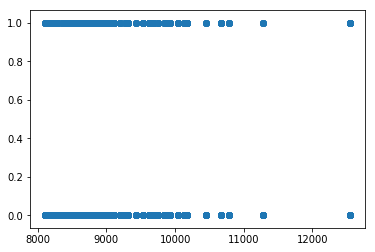

In [45]:
plt.scatter(df["avg_salary"],df["account_loan_bin"])

In [8]:
df.columns

Index(['Unnamed: 0', 'district_id', 'account_id', 'frequency', 'Date_Account',
       'client_id_owner', 'client_id_disponent', 'sex_owner', 'birth_owner',
       'sex_disponent', 'birth_disponent', 'loan_id', 'Date_Loan',
       'Amount_Loan', 'Duration_Loan', 'Payments_Loan', 'status',
       'Status_Loan', 'Ord_Insurance', 'Ord_Insurance_amount',
       'Ord_Household_Payment', 'Ord_Household_Payment_amount',
       'Ord_Loan_Payment', 'Ord_Loan_Payment_amount', 'Ord_Leasing',
       'Ord_Leasing_amount', 'Ord_Empty', 'Ord_Empty_amount',
       'owner_card_type', 'disponent_card_type', 'owner_card_date',
       'district_name', 'region', 'num_inhabitants', 'municip < 499',
       'municip 500-1999', 'municip 2000-9999', 'municip > 10000',
       'num_cities', 'ratio_urban_inhabitants', 'avg_salary',
       'unemployment_rate_95', 'unemployment_rate_96', 'entrepreneurs',
       'crimes_95', 'crimes_96', 'crimes_95_ratio', 'crimes_96_ratio',
       'entrepreneurs_ratio', 'Num_Type_Cre

In [9]:
#Tomamos un primer subconjunto de variables de prueba
df1=df[['frequency', 'sex_owner','sex_disponent', 'Ord_Insurance','Ord_Insurance_amount','Ord_Household_Payment',
        'Ord_Household_Payment_amount','Ord_Leasing','Ord_Leasing_amount','Ord_Empty','Ord_Empty_amount', 'avg_salary', 
        'num_inhabitants', 'municip < 499','municip 500-1999', 'municip 2000-9999', 'municip > 10000',
        'num_cities', 'ratio_urban_inhabitants', 'avg_salary',
        'unemployment_rate_95', 'unemployment_rate_96', 'entrepreneurs',
        'crimes_95', 'crimes_96', 'crimes_95_ratio', 'crimes_96_ratio',
        'entrepreneurs_ratio']]


In [53]:
df["sex_disponent"]

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
5         F
6       NaN
7       NaN
8         M
9       NaN
10        M
11      NaN
12        M
13      NaN
14      NaN
15      NaN
16      NaN
17      NaN
18      NaN
19        M
20      NaN
21        M
22        F
23      NaN
24      NaN
25      NaN
26      NaN
27      NaN
28        M
29      NaN
       ... 
4470    NaN
4471    NaN
4472    NaN
4473    NaN
4474    NaN
4475    NaN
4476    NaN
4477    NaN
4478    NaN
4479    NaN
4480    NaN
4481      F
4482    NaN
4483      M
4484      M
4485    NaN
4486    NaN
4487    NaN
4488    NaN
4489    NaN
4490    NaN
4491    NaN
4492    NaN
4493      F
4494      F
4495      F
4496    NaN
4497    NaN
4498    NaN
4499      M
Name: sex_disponent, Length: 4500, dtype: object

In [10]:
from imblearn.over_sampling import SMOTE

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
#from imblearn.over_sampling import SMOTENC  HAY QUE VER PORQUE NO CARGA¡¡¡¡¡

In [21]:
df2=pd.get_dummies(df1)

In [13]:
df2.dtypes

Ord_Insurance                     int64
Ord_Insurance_amount              int64
Ord_Household_Payment             int64
Ord_Household_Payment_amount      int64
Ord_Leasing                       int64
Ord_Leasing_amount              float64
Ord_Empty                         int64
Ord_Empty_amount                  int64
avg_salary                        int64
num_inhabitants                   int64
municip < 499                     int64
municip 500-1999                  int64
municip 2000-9999                 int64
municip > 10000                   int64
num_cities                        int64
ratio_urban_inhabitants         float64
avg_salary                        int64
unemployment_rate_95            float64
unemployment_rate_96            float64
entrepreneurs                     int64
crimes_95                       float64
crimes_96                         int64
crimes_95_ratio                 float64
crimes_96_ratio                 float64
entrepreneurs_ratio             float64


In [14]:
X = df2
y = df["account_loan_bin"] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

<function matplotlib.pyplot.show(*args, **kw)>

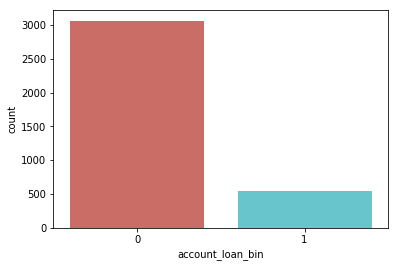

In [15]:
#Las clases de train están desbalanceadas
y_train2=pd.DataFrame(y_train)
sns.countplot(x="account_loan_bin",data=y_train2, palette='hls')
plt.show

In [16]:
#Para hacer SMOTE y balancear las clases
os = SMOTE(random_state=0)
columns = X_train.columns
os_X_train,os_y_train=os.fit_sample(X_train, y_train)
os_X_train = pd.DataFrame(data=os_X_train,columns=columns )
os_y_train= pd.DataFrame(data=os_y_train,columns=['account_loan_bin'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_X_train))
print("Number of loans=0 in oversampled data",len(os_y_train[os_y_train['account_loan_bin']==0]))
print("Number of loans=1",len(os_y_train[os_y_train['account_loan_bin']==1]))
print("Proportion of loans=0 is ",len(os_y_train[os_y_train['account_loan_bin']==0])/len(os_X_train))
print("Proportion of loans=1 is ",len(os_y_train[os_y_train['account_loan_bin']==1])/len(os_X_train))

length of oversampled data is  6122
Number of loans=0 in oversampled data 3061
Number of loans=1 3061
Proportion of loans=0 is  0.5
Proportion of loans=1 is  0.5


# Vamos a probar con un árbol normal

In [38]:
clf_tree = DecisionTreeClassifier(min_samples_leaf=5,max_depth=3)

In [39]:
clf_tree.fit(os_X_train,os_y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [36]:
#Predicción en el conjunto de train con un árbol de prueba
print("El accuracy es",accuracy_score(os_y_train,clf_tree.predict(os_X_train))*100,"%")
print("La precision es",precision_score(os_y_train,clf_tree.predict(os_X_train))*100, "%")
print("El recall es",recall_score(os_y_train,clf_tree.predict(os_X_train))*100,"%")
print("Matriz de confusión",confusion_matrix(os_y_train,clf_tree.predict(os_X_train)))
tn, fp, fn, tp=confusion_matrix(os_y_train,clf_tree.predict(os_X_train)).ravel()
(tn, fp, fn, tp)

El accuracy es 80.08820646847435 %
La precision es 96.51515151515152 %
El recall es 62.430578242404444 %
Matriz de confusión [[2992   69]
 [1150 1911]]


(2992, 69, 1150, 1911)

In [40]:
#Predicción en el conjunto de test con un árbol de test
print("El accuracy es",accuracy_score(y_test,clf_tree.predict(X_test))*100,"%")
print("La precision es",precision_score(y_test,clf_tree.predict(X_test))*100, "%")
print("El recall es",recall_score(y_test,clf_tree.predict(X_test))*100,"%")
print("Matriz de confusión",confusion_matrix(y_test,clf_tree.predict(X_test)))
tn, fp, fn, tp=confusion_matrix(y_test,clf_tree.predict(X_test)).ravel()
(tn, fp, fn, tp)

El accuracy es 83.33333333333334 %
La precision es 43.39622641509434 %
El recall es 16.083916083916083 %
Matriz de confusión [[727  30]
 [120  23]]


(727, 30, 120, 23)

0.560604520974402


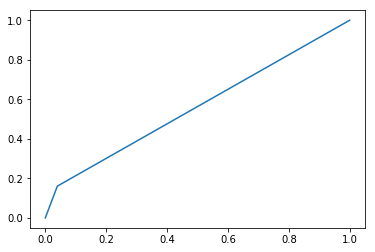

In [41]:
#Seguimos la evaluación del modelo en el dataset de test
from sklearn.metrics import roc_curve, auc
# We chose the target
target_pos = 1 # Or 0 for the other class
fp,tp,_ = roc_curve(y_test,clf_tree.predict(X_test))
plt.plot(fp,tp)
print(auc(fp,tp))

In [24]:
X_train.columns.values.tolist()

['Ord_Insurance',
 'Ord_Insurance_amount',
 'Ord_Household_Payment',
 'Ord_Household_Payment_amount',
 'Ord_Leasing',
 'Ord_Leasing_amount',
 'Ord_Empty',
 'Ord_Empty_amount',
 'avg_salary',
 'num_inhabitants',
 'municip < 499',
 'municip 500-1999',
 'municip 2000-9999',
 'municip > 10000',
 'num_cities',
 'ratio_urban_inhabitants',
 'avg_salary',
 'unemployment_rate_95',
 'unemployment_rate_96',
 'entrepreneurs',
 'crimes_95',
 'crimes_96',
 'crimes_95_ratio',
 'crimes_96_ratio',
 'entrepreneurs_ratio',
 'frequency_After_trans',
 'frequency_Monthly',
 'frequency_Weekly',
 'sex_owner_F',
 'sex_owner_M',
 'sex_disponent_F',
 'sex_disponent_M']

In [42]:
unique(X_train.loc[:,"frequency_Monthly"])

array([0, 1], dtype=uint8)

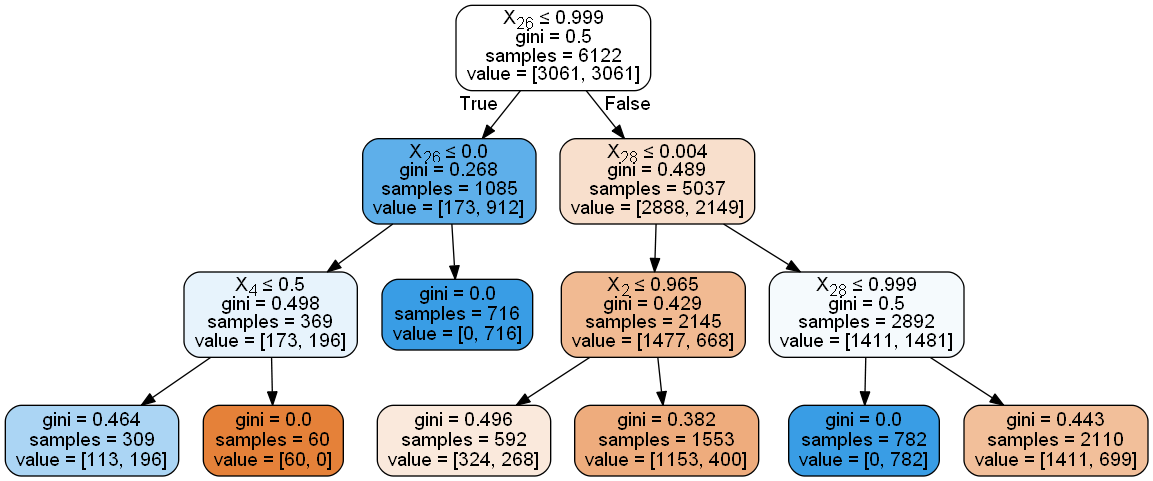

In [43]:
#Vamos a dibujar el modelo
from io import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf_tree, out_file=dot_data,filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [26]:
clf_tree.feature_importances_

array([0.        , 0.        , 0.02979684, 0.        , 0.        ,
       0.03690668, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.37693855, 0.        , 0.46580755, 0.09055037,
       0.        , 0.        ])

In [27]:
clf_tree.classes_

array([0, 1], dtype=int64)

In [28]:
unique(pd.DataFrame(clf_tree.predict_proba(X_test)))

array([0.        , 0.257566  , 0.33127962, 0.36569579, 0.4527027 ,
       0.5472973 , 0.63430421, 0.66872038, 0.742434  , 1.        ])

# Vamos a probar con Cross-Validation y GridSearch

In [29]:
from sklearn.model_selection import cross_val_score

cross_val_score(clf_tree,X,y,cv=5,scoring="precision")

array([0.33333333, 0.40909091, 0.66666667, 0.39130435, 0.5       ])

In [30]:
from sklearn.model_selection import GridSearchCV
grid = {'max_depth': [2,3,4,5,6,7,8,9,10],'min_samples_leaf': [5,10,15,20,25,30]}
clf_tree_grid=GridSearchCV(DecisionTreeClassifier(),grid,cv=7,scoring="precision")
clf_tree_grid.fit(X,y)

print("tuned hpyerparameters :(best parameters) ",clf_tree_grid.best_params_)
print("precision :",clf_tree_grid.best_score_)

C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: U

C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: U

C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\osmaa\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: U

tuned hpyerparameters :(best parameters)  {'max_depth': 6, 'min_samples_leaf': 20}
precision : 0.46296248196248196


In [31]:
print("tuned hpyerparameters :(best parameters) ",clf_tree_grid.best_params_)
print("precision :",clf_tree_grid.best_score_)

tuned hpyerparameters :(best parameters)  {'max_depth': 6, 'min_samples_leaf': 20}
precision : 0.46296248196248196


In [32]:
np.corrcoef(y_test,clf_tree.predict(X_test))[0][1]

0.18822241312883603

In [33]:
np.corrcoef(y_test,clf_tree.predict(X_test))

array([[1.        , 0.18822241],
       [0.18822241, 1.        ]])

In [59]:
RobustScaler?

In [ ]:
#Vamos a escalar variables

In [55]:
from sklearn.preprocessing import RobustScaler

In [56]:
df_cat=df["sex_disponent"]

In [61]:
df_cat["sex_disponent"].fillna("None")

KeyError: 'sex_disponent'

In [60]:
pd.get_dummies(df_cat)

,F,M
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,1,0
6,0,0
7,0,0
8,0,1
9,0,0


In [62]:
rbs = RobustScaler()
df_cat_scale = rbs.fit_transform(df_cat)

ValueError: could not convert string to float: 'F'

In [64]:
df_cat.dtypes

dtype('O')